# Task 3: News Sentiment and Stock Price Movement Analysis

This notebook analyzes the correlation between news sentiment and stock price movements for major tech companies. We'll combine:
1. News data with topics and events (from Task 1)
2. Stock price data with technical indicators (from Task 2)
3. Sentiment analysis of news headlines

Key Components:
- Sentiment Analysis: Using TextBlob and NLTK for headline analysis
- Technical Analysis: Incorporating indicators from QuantitativeAnalyzer
- Correlation Analysis: Measuring relationships between sentiment and price movements
- Event Impact Analysis: Understanding how specific events affect stock prices
- Topic-based Analysis: Analyzing sentiment patterns across different topics

Required Input:
- News data path: "../Data/cleaned/analyzed/tech_news_with_topics_and_events.csv"
- Stock data directory: "../../../Data/data-week1/yfinance_data/"

Let's proceed with the implementation step by step.

In [5]:
# Import required libraries
import sys
import os
import pandas as pd
import numpy as np
import seaborn as sns  # Import seaborn first
import matplotlib.pyplot as plt
from datetime import datetime

# Add the project root directory to path
sys.path.append(os.path.abspath(os.path.join(os.getcwd(), '..')))

# Import our analyzers
from scripts.sentiment_analysis import SentimentAnalyzer
from src.Quantitative_Analysis import QuantitativeAnalyzer

# Set display options
pd.set_option('display.max_columns', None)
sns.set_style("whitegrid")  # Set seaborn style directly

## Data Loading and Initialization

In this section, we'll:
1. Initialize the SentimentAnalyzer
2. Load the preprocessed news data (with topics and events)
3. Load stock price data for all companies

Please verify the following paths before proceeding:
- News data path: Should point to the output from Task 1's topic modeling
- Stock data directory: Should contain the historical price CSV files

The analyzer will automatically handle:
- Company symbol mappings (META->FB, MSFT->MSF)
- Date alignment between news and stock data
- Technical indicator calculation

In [6]:
# Initialize the analyzer
analyzer = SentimentAnalyzer()

# TODO: Verify these paths match your directory structure
NEWS_DATA_PATH = "../Data/cleaned/analyzed/tech_news_with_topics_and_events.csv"
STOCK_DATA_DIR = "../../../Data/data-week1/yfinance_data"

# Load data
print("Loading news data...")
analyzer.load_news_data(NEWS_DATA_PATH)

print("\nLoading stock data...")
analyzer.load_stock_data(STOCK_DATA_DIR)

Loading news data...
Successfully loaded news data with shape: (7261, 9)

Loading stock data...


c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:383: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(drawdown.min())
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WE

Calculated metrics for AAPL: {'daily_returns_mean': 0.0010725454213135592, 'daily_returns_std': 0.027894654013952986, 'annualized_volatility': 0.4428139045746556, 'total_return': 1703.740355599395, 'sharpe_ratio': 0.6103725365865272, 'sortino_ratio': 0.8426397728820323, 'max_drawdown': -0.8221656792419105, 'var_95': -0.040806222411848704, 'cvar_95': -0.0610206537993203, 'rsi_latest': 49.35911481788743, 'macd_latest': 2.0127636661209465, 'bb_width': 0.09668570808539026}
Successfully loaded AAPL stock data with technical indicators from ../../../Data/data-week1/yfinance_data\AAPL_historical_data.csv
Calculated metrics for AMZN: {'daily_returns_mean': 0.0017158528338257978, 'daily_returns_std': 0.0354291378857019, 'annualized_volatility': 0.5624201280659038, 'total_return': 1854.7554917187751, 'sharpe_ratio': 0.7688112365591466, 'sortino_ratio': 1.130670811524101, 'max_drawdown': -0.9440421779932859, 'var_95': -0.04798618930711764, 'cvar_95': -0.07691714752744622, 'rsi_latest': 40.4088430

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:383: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(drawdown.min())


Calculated metrics for GOOG: {'daily_returns_mean': 0.0010285281268231894, 'daily_returns_std': 0.019318195592247803, 'annualized_volatility': 0.3066668478935509, 'total_return': 67.76784590603965, 'sharpe_ratio': 0.8451813090973972, 'sortino_ratio': 1.206600322130473, 'max_drawdown': -0.6529476078105549, 'var_95': -0.027904042141455265, 'cvar_95': -0.04329058968321088, 'rsi_latest': 37.9200675281078, 'macd_latest': -2.708090805193848, 'bb_width': 0.1656523240687724}
Successfully loaded GOOG stock data with technical indicators from ../../../Data/data-week1/yfinance_data\GOOG_historical_data.csv


c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:383: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(drawdown.min())


Calculated metrics for META: {'daily_returns_mean': 0.001259620505508373, 'daily_returns_std': 0.024277124703790204, 'annualized_volatility': 0.385387407083589, 'total_return': 15.794416378633745, 'sharpe_ratio': 0.8236500766597752, 'sortino_ratio': 1.1070148944459874, 'max_drawdown': -0.7673609153644646, 'var_95': -0.03344072621131371, 'cvar_95': -0.052520093081295, 'rsi_latest': 39.78937332877596, 'macd_latest': -10.357946725613317, 'bb_width': 0.21598581073467887}
Successfully loaded META stock data with technical indicators from ../../../Data/data-week1/yfinance_data\META_historical_data.csv


c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:383: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(drawdown.min())


Calculated metrics for MSFT: {'daily_returns_mean': 0.0010906189084472473, 'daily_returns_std': 0.02112618090033422, 'annualized_volatility': 0.3353677248890819, 'total_return': 4349.044350657177, 'sharpe_ratio': 0.8195063046678223, 'sortino_ratio': 1.1487840164372216, 'max_drawdown': -0.7456453369396806, 'var_95': -0.030119644019256597, 'cvar_95': -0.04616152794946665, 'rsi_latest': 37.080268954304664, 'macd_latest': -5.181611883238304, 'bb_width': 0.135773006817284}
Successfully loaded MSFT stock data with technical indicators from ../../../Data/data-week1/yfinance_data\MSFT_historical_data.csv
Calculated metrics for TSLA: {'daily_returns_mean': 0.0020348584568402645, 'daily_returns_std': 0.03587138288459076, 'annualized_volatility': 0.5694405497796355, 'total_return': 138.77811897209477, 'sharpe_ratio': 0.9005054721202873, 'sortino_ratio': 1.3239209754166417, 'max_drawdown': -0.736322174421912, 'var_95': -0.05092611385965415, 'cvar_95': -0.07834917626503418, 'rsi_latest': 48.2204744

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:383: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  return float(drawdown.min())
c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\src\Quantitative_Analysis.py:355: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  'total_return': float((stock_data['Close'].iloc[-1] / stock_data['Close'].iloc[0]) - 1),
c:\Users\adoni\Desktop\KAIM COURSE\WE

## Sentiment Analysis and Correlation

Now that we have loaded both news and stock data, we'll:
1. Calculate daily sentiment scores for each company
2. Align sentiment scores with stock price movements
3. Compute correlations between sentiment and various market indicators

The analysis will consider:
- Daily average sentiment
- News volume (count of articles)
- Topic distribution
- Specific events identified

In [ ]:
# Calculate daily sentiment scores and align with stock data
print("\nAnalyzing daily sentiment...")
analyzer.analyze_daily_sentiment()

# Calculate correlations between sentiment and stock movements
print("\nCalculating correlations...")
correlations = analyzer.calculate_correlations()

# Display correlation results
for symbol, metrics in correlations.items():
    print(f"\nCorrelations for {symbol}:")
    for metric, value in metrics.items():
        print(f"{metric}: {value:.4f}")


Analyzing daily sentiment...

Processing AAPL (News symbol: AAPL)
Unnamed: 0                  int64
headline                   object
url                        object
publisher                  object
date               datetime64[ns]
stock                      object
specific_events            object
topics                     object
year                        int64
dtype: object
News data range: 2020-03-09 to 2020-06-02
datetime64[ns]
-----------------------------------------------------------------------------
Stock data range: 1980-12-12 to 2024-07-30
Overlapping range: 2020-03-09 to 2020-06-02
Reindexed stock data shape: (78, 22)
News data shape: (78, 5)

Reindexed Stock Data Sample (first 3 rows):
            Open_AAPL  High_AAPL   Low_AAPL      Close  Adj Close_AAPL  \
Date                                                                     
2020-03-09  65.937500  69.522499  65.750000  66.542503       64.736046   
2020-03-10  69.285004  71.610001  67.342499  71.334999       6

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


datetime64[ns]
-----------------------------------------------------------------------------
Stock data range: 1997-05-15 to 2024-07-30
Overlapping range: 2020-04-27 to 2020-06-02
Reindexed stock data shape: (35, 22)
News data shape: (35, 5)

Reindexed Stock Data Sample (first 3 rows):
             Open_AMZN   High_AMZN    Low_AMZN       Close  Adj Close_AMZN  \
Date                                                                         
2020-04-27  122.160004  122.244003  118.150002  118.800003      118.800003   
2020-04-28  118.605003  118.675003  115.300003  115.704002      115.704002   
2020-04-29  116.500504  119.594498  115.500000  118.635498      118.635498   

            Volume_AMZN  Dividends_AMZN  Stock Splits_AMZN   Returns  \
Date                                                                   
2020-04-27  112912000.0             0.0                0.0 -0.014198   
2020-04-28  105388000.0             0.0                0.0 -0.026061   
2020-04-29   91832000.0           

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


datetime64[ns]
-----------------------------------------------------------------------------
Stock data range: 2004-08-19 to 2024-07-30
Overlapping range: 2018-11-13 to 2020-06-02
Reindexed stock data shape: (372, 22)
News data shape: (372, 5)

Reindexed Stock Data Sample (first 3 rows):
            Open_GOOG  High_GOOG   Low_GOOG      Close  Adj Close_GOOG  \
Date                                                                     
2018-11-13  52.164501  52.830250  51.557499  51.802502       51.743618   
2018-11-14  52.500000  52.728199  51.549999  52.182999       52.123684   
2018-11-15  52.235500  53.592499  51.589001  53.235500       53.174988   

            Volume_GOOG  Dividends_GOOG  Stock Splits_GOOG   Returns  \
Date                                                                   
2018-11-13   30274000.0             0.0                0.0 -0.002484   
2018-11-14   31318000.0             0.0                0.0  0.007345   
2018-11-15   36722000.0             0.0             

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


datetime64[ns]
-----------------------------------------------------------------------------
Stock data range: 2012-12-12 to 2024-07-30
Overlapping range: 2020-02-19 to 2020-06-02
Reindexed stock data shape: (80, 22)
News data shape: (80, 5)

Reindexed Stock Data Sample (first 3 rows):
             Open_META   High_META    Low_META       Close  Adj Close_META  \
Date                                                                         
2020-02-19  217.990005  218.320007  216.110001  217.490005      217.043991   
2020-02-20  216.520004  218.770004  212.949997  214.580002      214.139954   
2020-02-21  213.479996  214.240005  208.830002  210.179993      209.748962   

            Volume_META  Dividends_META  Stock Splits_META   Returns    MA_20  \
Date                                                                            
2020-02-19   12135100.0             0.0                0.0 -0.001423  213.364   
2020-02-20   13109200.0             0.0                0.0 -0.013380  213.027  

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


Stock data range: 1986-03-13 to 2024-07-30
Overlapping range: 2010-04-06 to 2016-06-30
Reindexed stock data shape: (2, 22)
News data shape: (2, 5)

Reindexed Stock Data Sample (first 3 rows):
            Open_MSFT  High_MSFT  Low_MSFT      Close  Adj Close_MSFT  \
Date                                                                    
2010-04-06  29.150000  29.580000     28.98  29.320000       22.221144   
2016-06-30  50.720001  51.299999     50.50  51.169998       45.869160   

            Volume_MSFT  Dividends_MSFT  Stock Splits_MSFT   Returns    MA_20  \
Date                                                                            
2010-04-06     47366800             0.0                0.0  0.001708  29.4455   
2016-06-30     28527800             0.0                0.0  0.012465  50.7455   

              MA_50    MA_200        RSI      MACD  MACD_Signal  MACD_Hist  \
Date                                                                         
2010-04-06  28.9060  27.21550  50.

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


datetime64[ns]
-----------------------------------------------------------------------------
Stock data range: 2010-06-29 to 2024-07-30
Overlapping range: 2019-07-01 to 2020-06-02
Reindexed stock data shape: (283, 22)
News data shape: (283, 5)

Reindexed Stock Data Sample (first 3 rows):
            Open_TSLA  High_TSLA   Low_TSLA      Close  Adj Close_TSLA  \
Date                                                                     
2019-07-01  15.347333  15.540000  15.085333  15.144667       15.144667   
2019-07-02  15.259333  15.276667  14.814667  14.970000       14.970000   
2019-07-03  15.959333  16.104668  15.634000  15.660000       15.660000   

            Volume_TSLA  Dividends_TSLA  Stock Splits_TSLA   Returns  \
Date                                                                   
2019-07-01  123201000.0             0.0                0.0  0.016603   
2019-07-02  138885000.0             0.0                0.0 -0.011533   
2019-07-03  213016500.0             0.0             

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


datetime64[ns]
-----------------------------------------------------------------------------
Stock data range: 1999-01-22 to 2024-07-30
Overlapping range: 2011-03-03 to 2020-05-28
Reindexed stock data shape: (1192, 22)
News data shape: (1192, 5)

Reindexed Stock Data Sample (first 3 rows):
            Open_NVDA  High_NVDA  Low_NVDA    Close  Adj Close_NVDA  \
Date                                                                  
2011-03-03    0.53075    0.53375   0.50600  0.52175        0.478563   
2011-03-07    0.52275    0.52450   0.49875  0.51175        0.469391   
2011-03-08    0.51725    0.52000   0.47800  0.48875        0.448295   

             Volume_NVDA  Dividends_NVDA  Stock Splits_NVDA   Returns  \
Date                                                                    
2011-03-03  1.593704e+09             0.0                0.0  0.005783   
2011-03-07  1.019140e+09             0.0                0.0 -0.013969   
2011-03-08  1.947184e+09             0.0                0.0 -

c:\Users\adoni\Desktop\KAIM COURSE\WEEK-1\StockSentimentPrediction-week1\scripts\sentiment_analysis.py:282: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  merged_data['Sentiment'] = merged_data['Sentiment'].fillna(method='ffill')


## Visualization and Analysis

Let's create comprehensive visualizations to understand the relationships between:
1. News sentiment and stock price movements
2. Sentiment trends and technical indicators
3. Event impacts on both sentiment and price
4. Topic-based sentiment patterns

We'll analyze each company separately to identify company-specific patterns.


Generating visualizations...

Plotting analysis for AAPL...


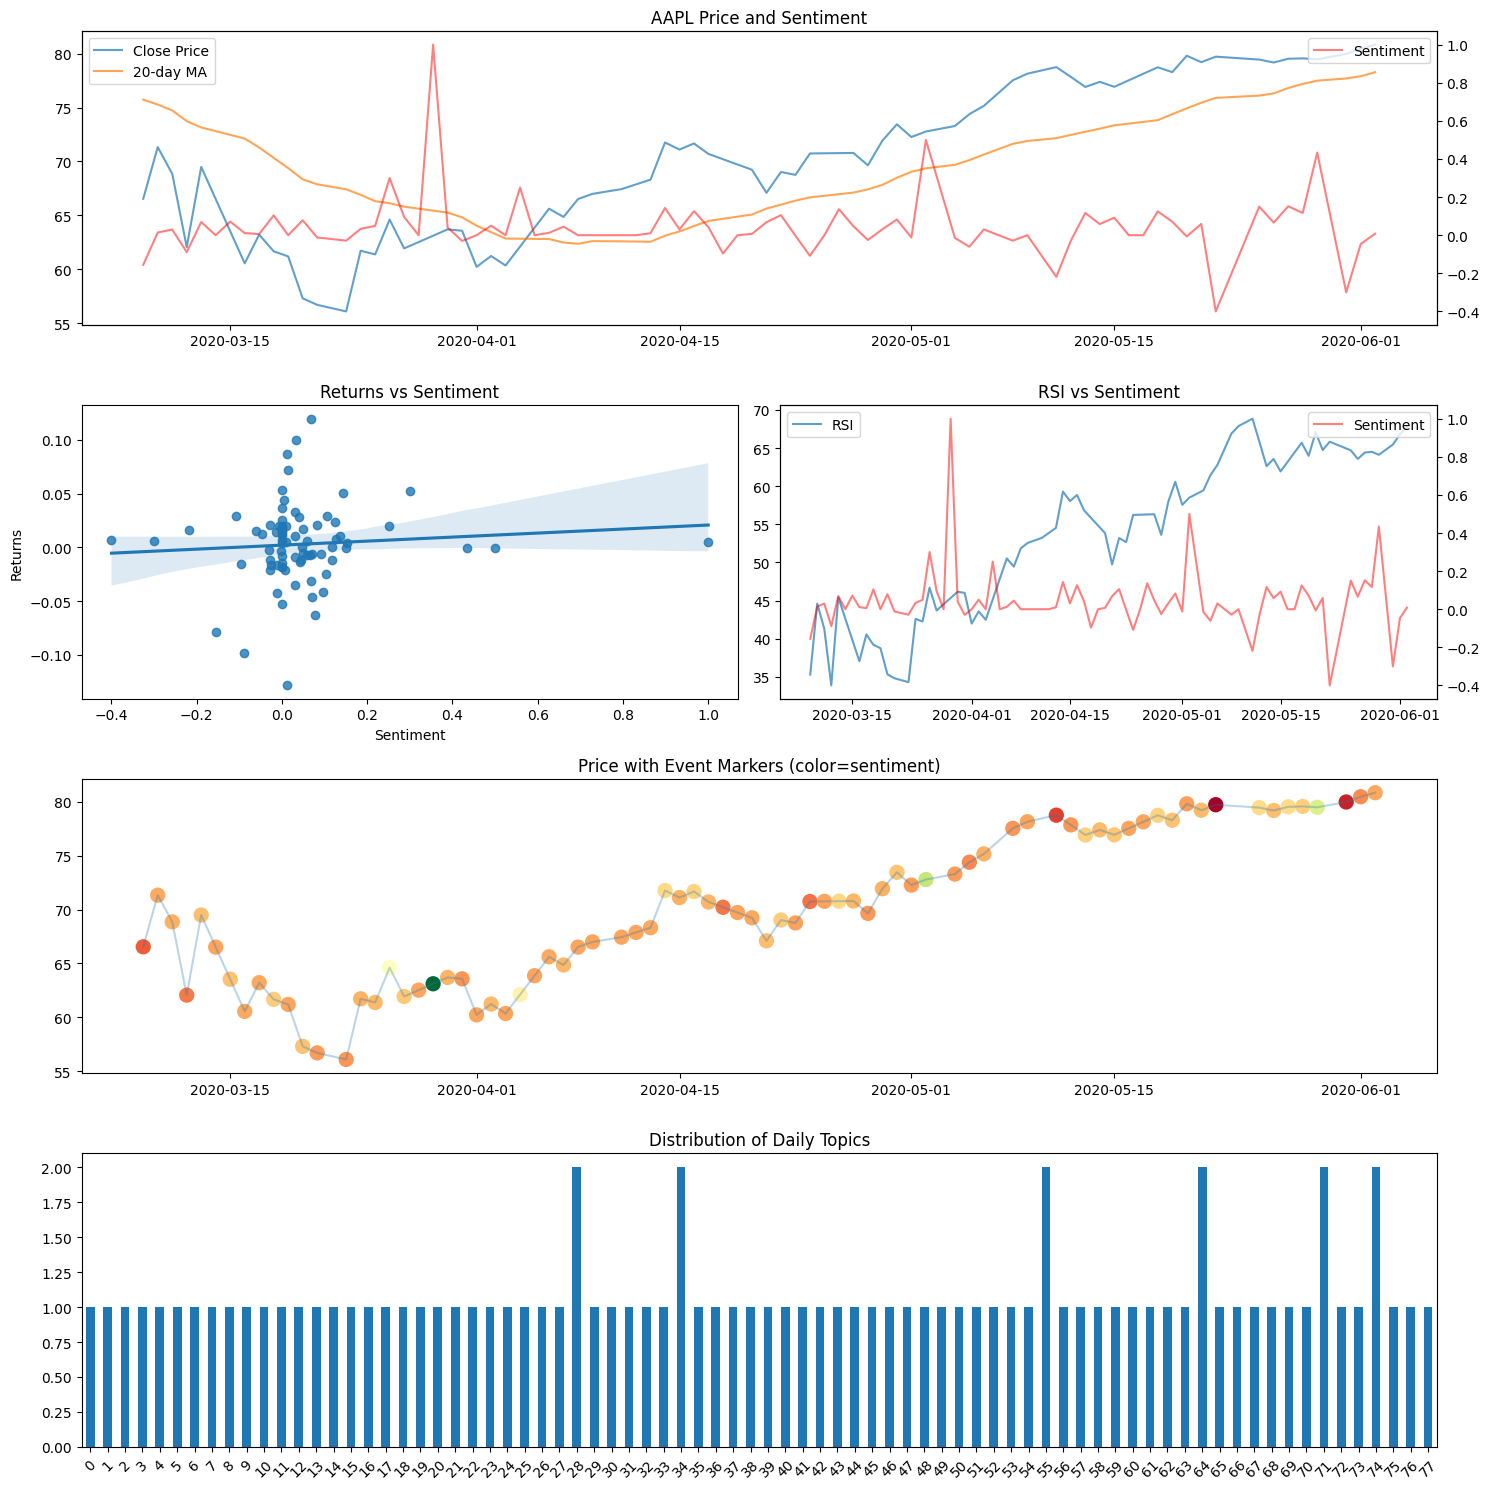


Plotting analysis for AMZN...


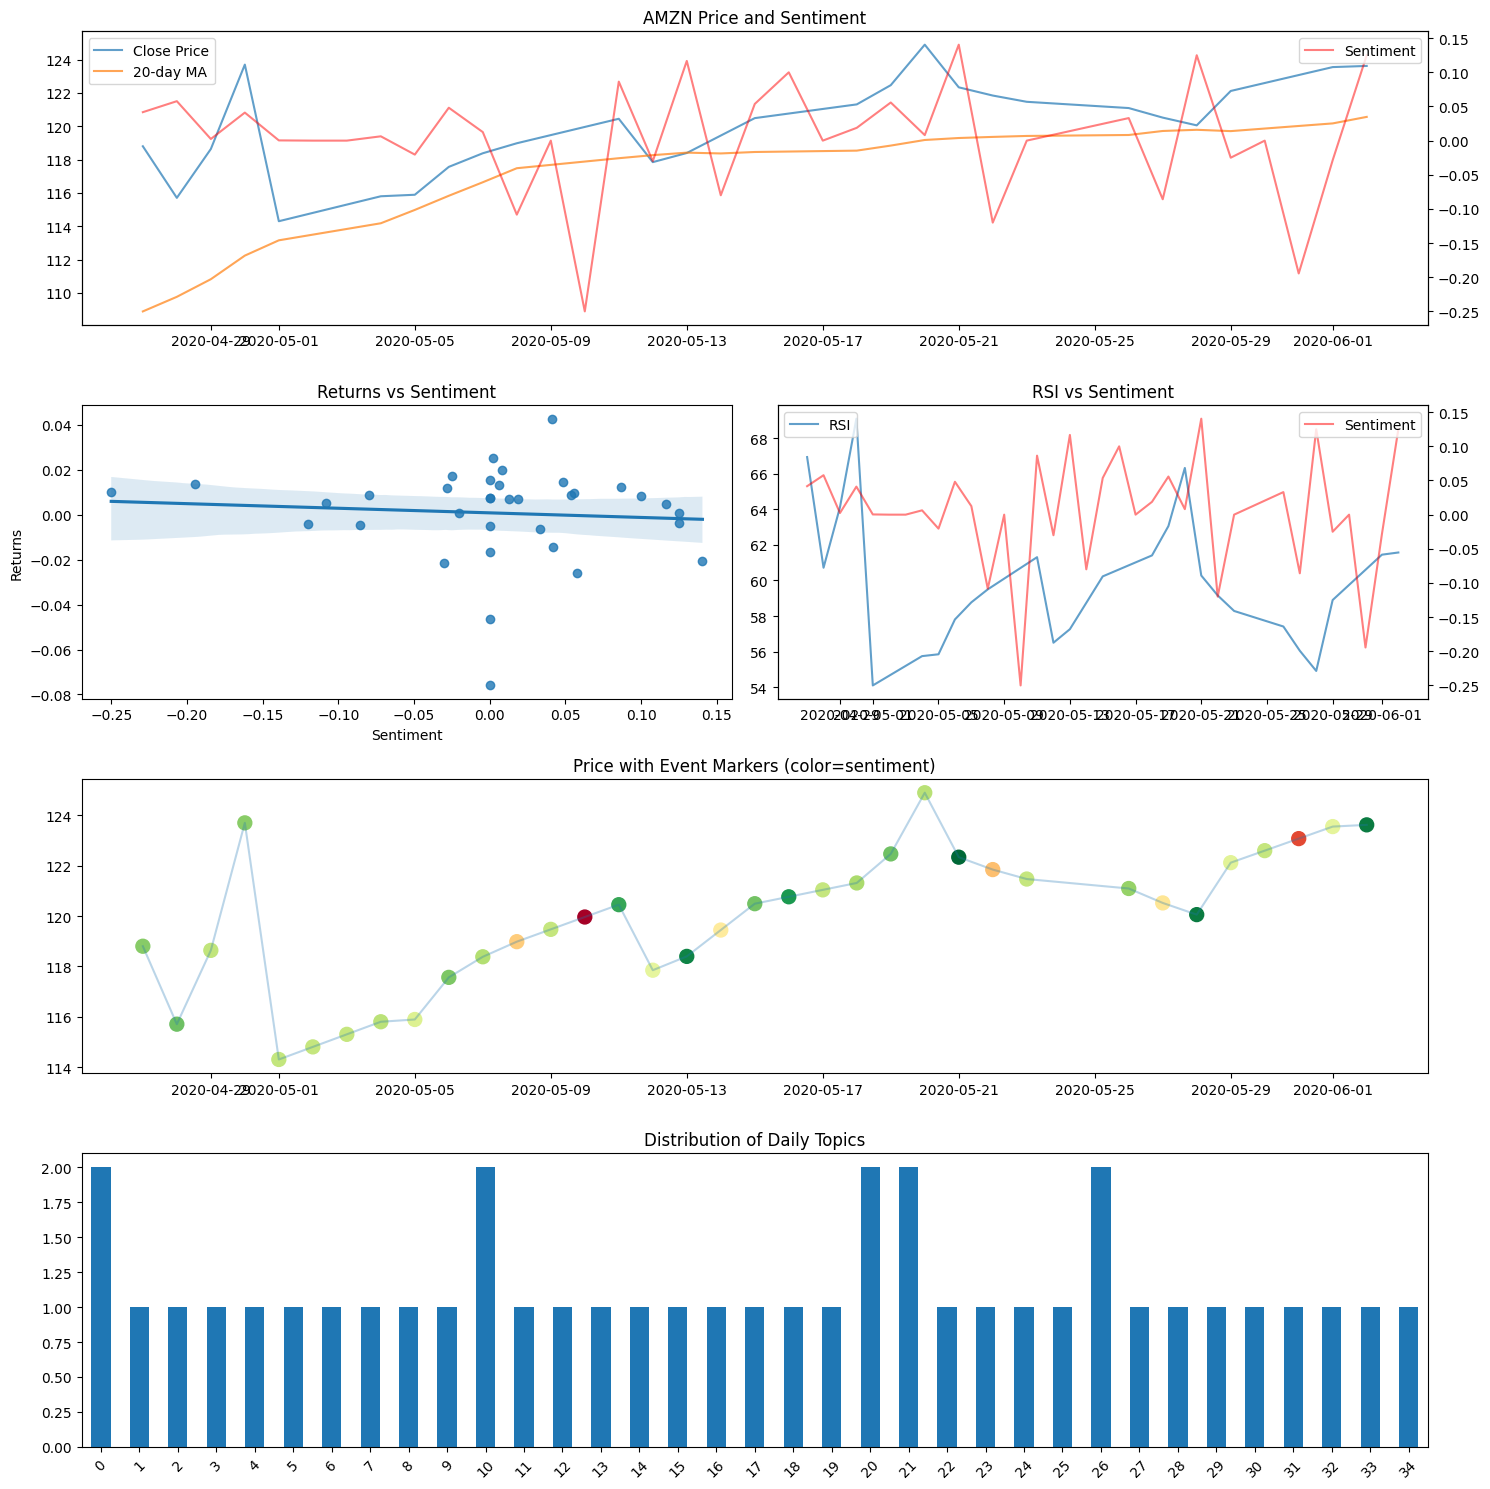


Plotting analysis for GOOG...


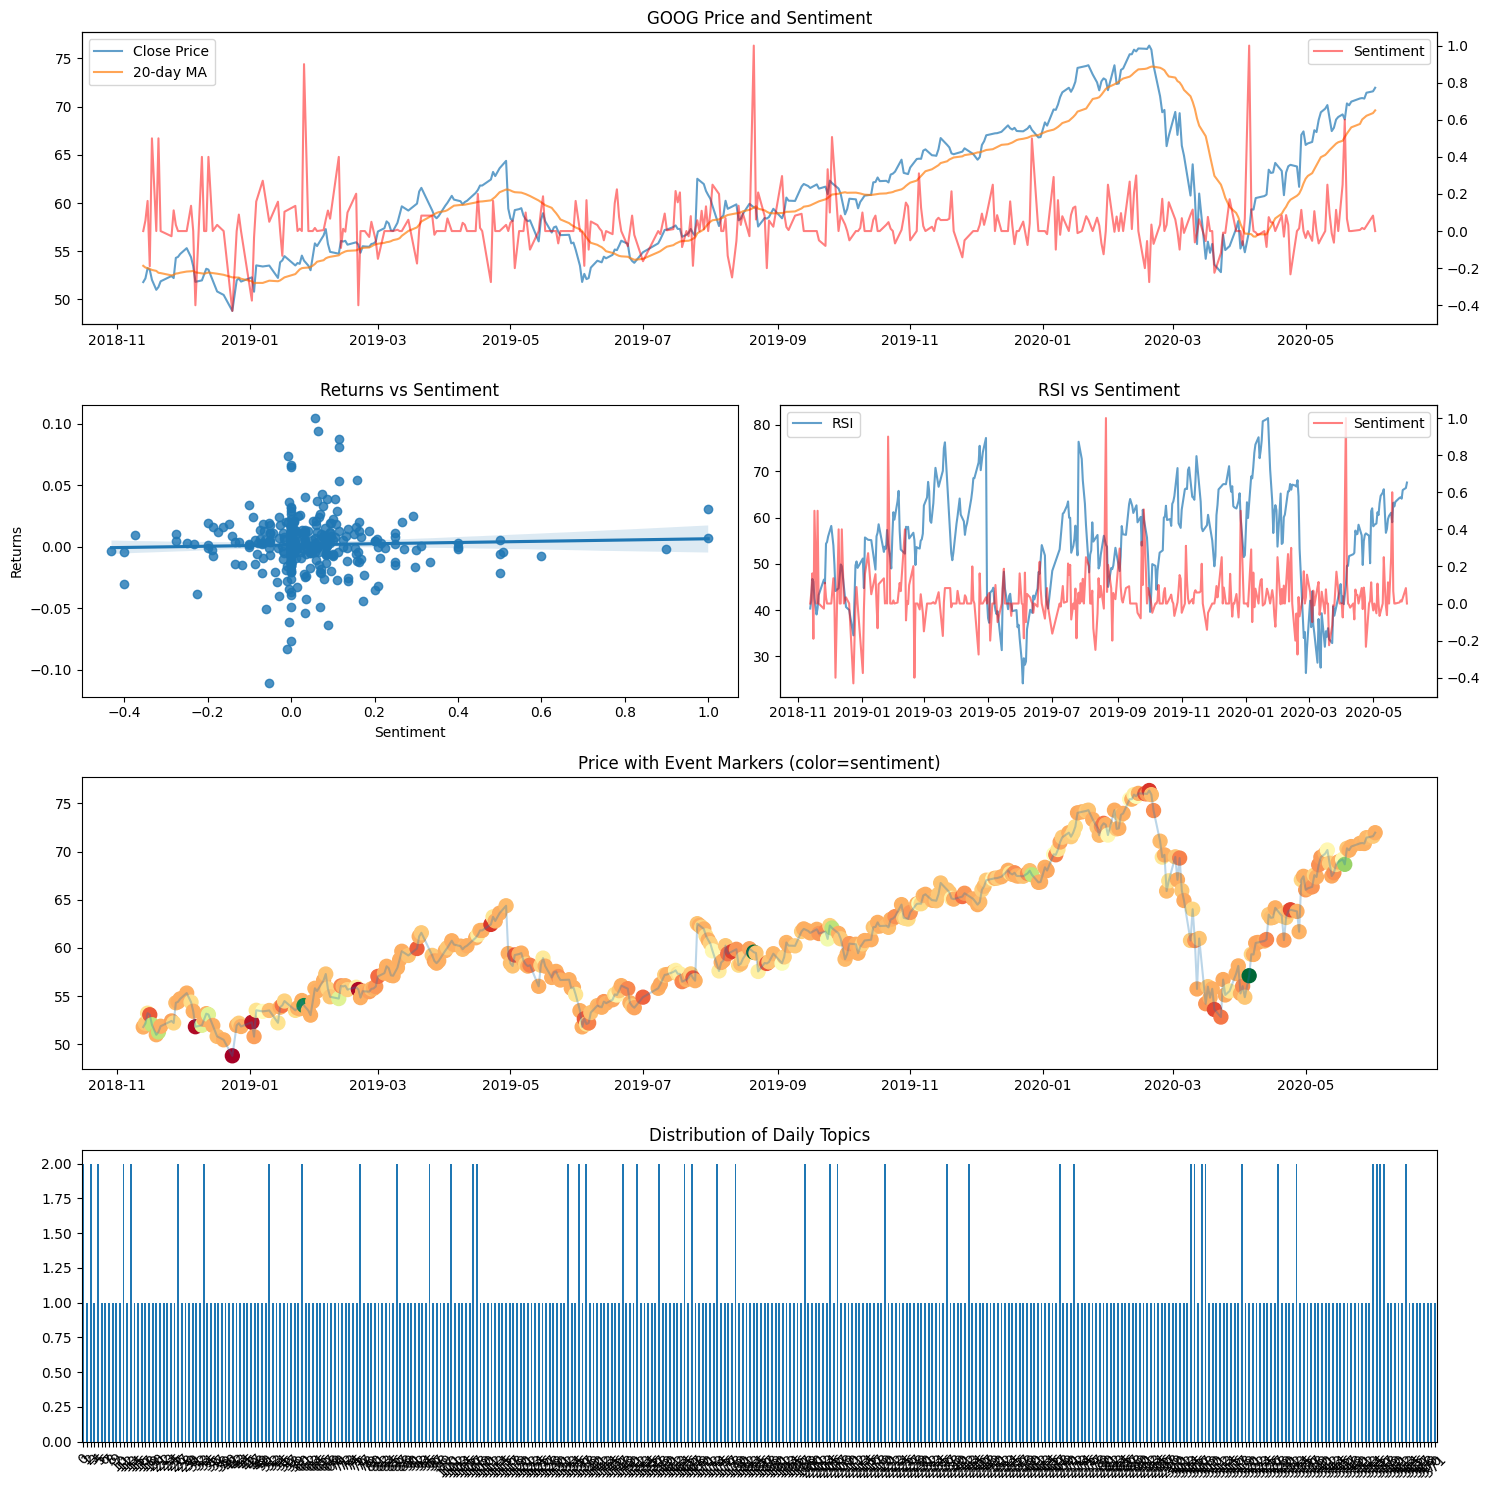


Plotting analysis for META...


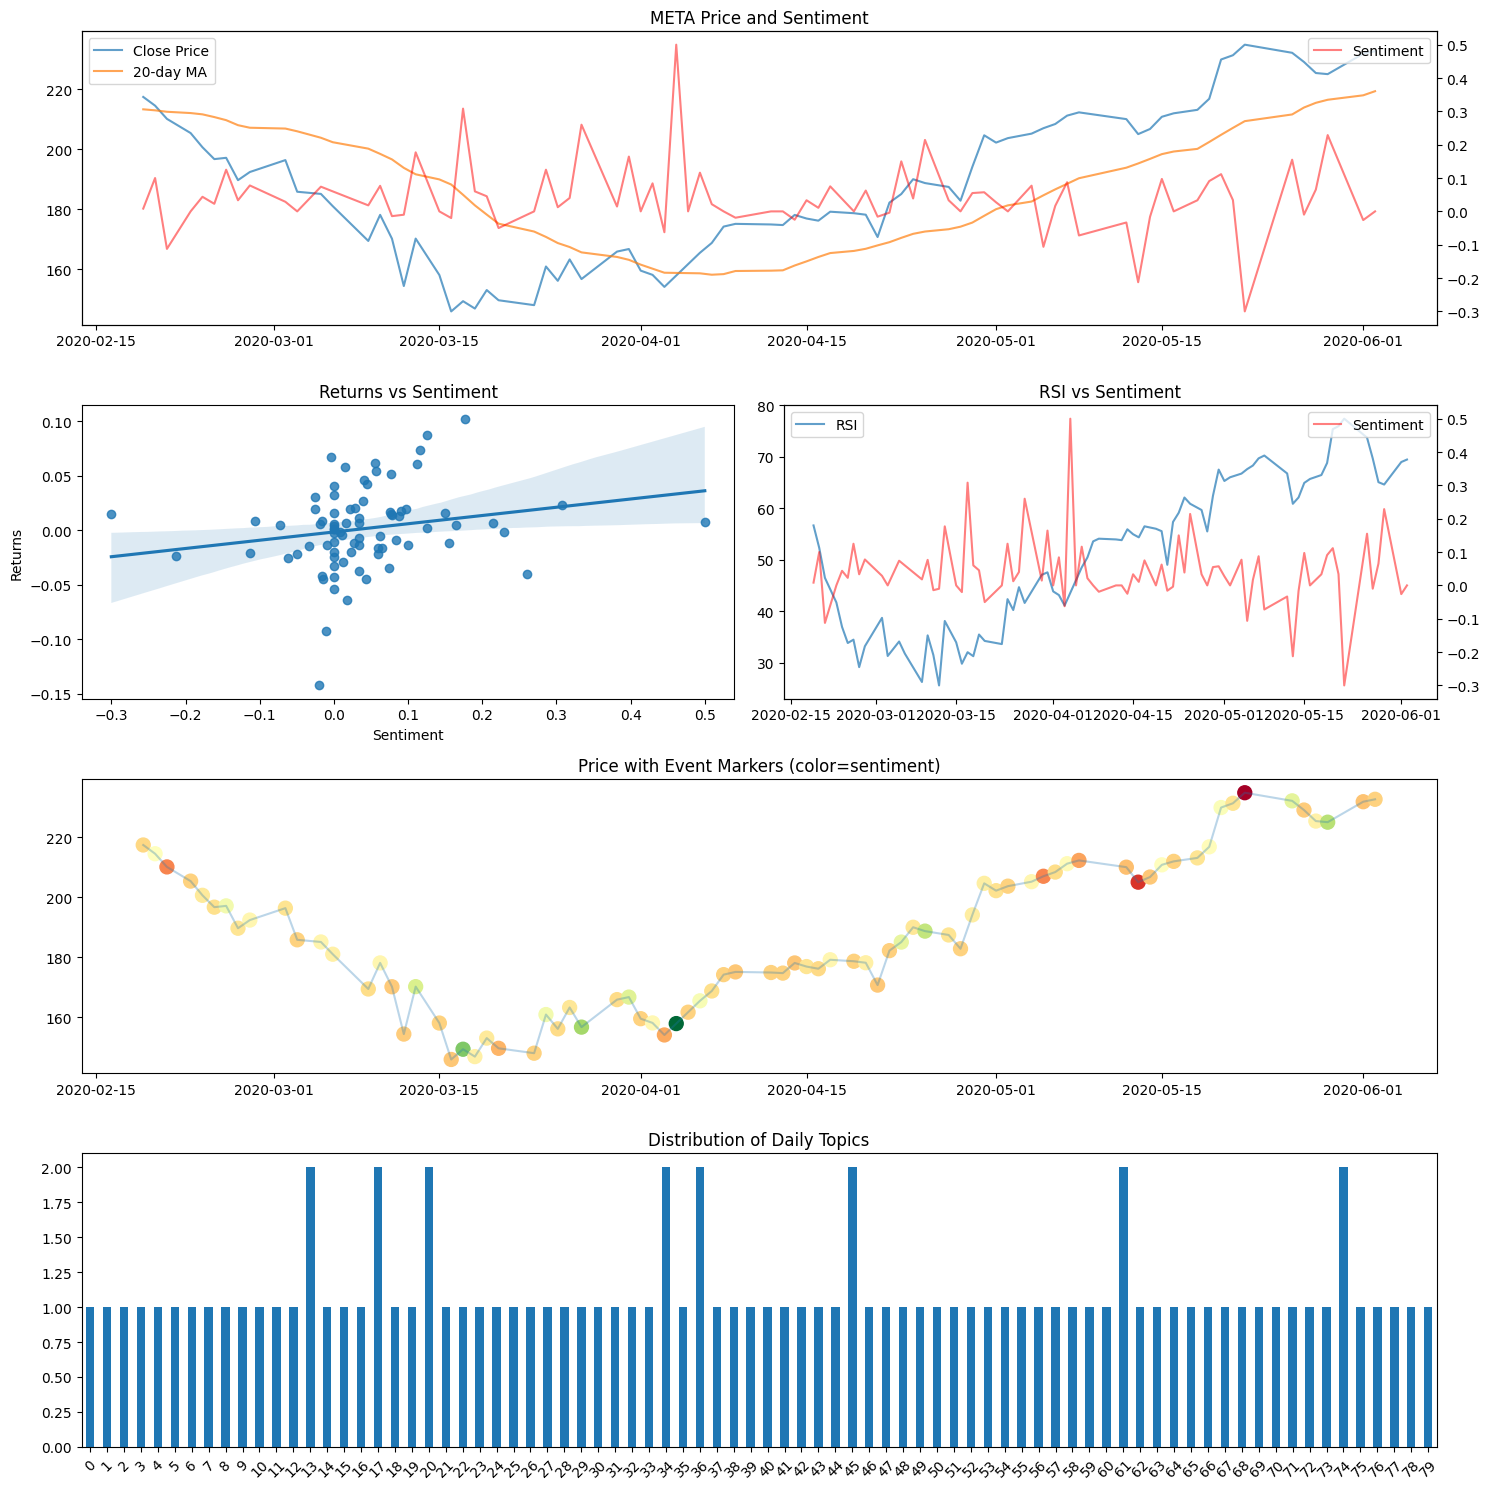


Plotting analysis for MSFT...


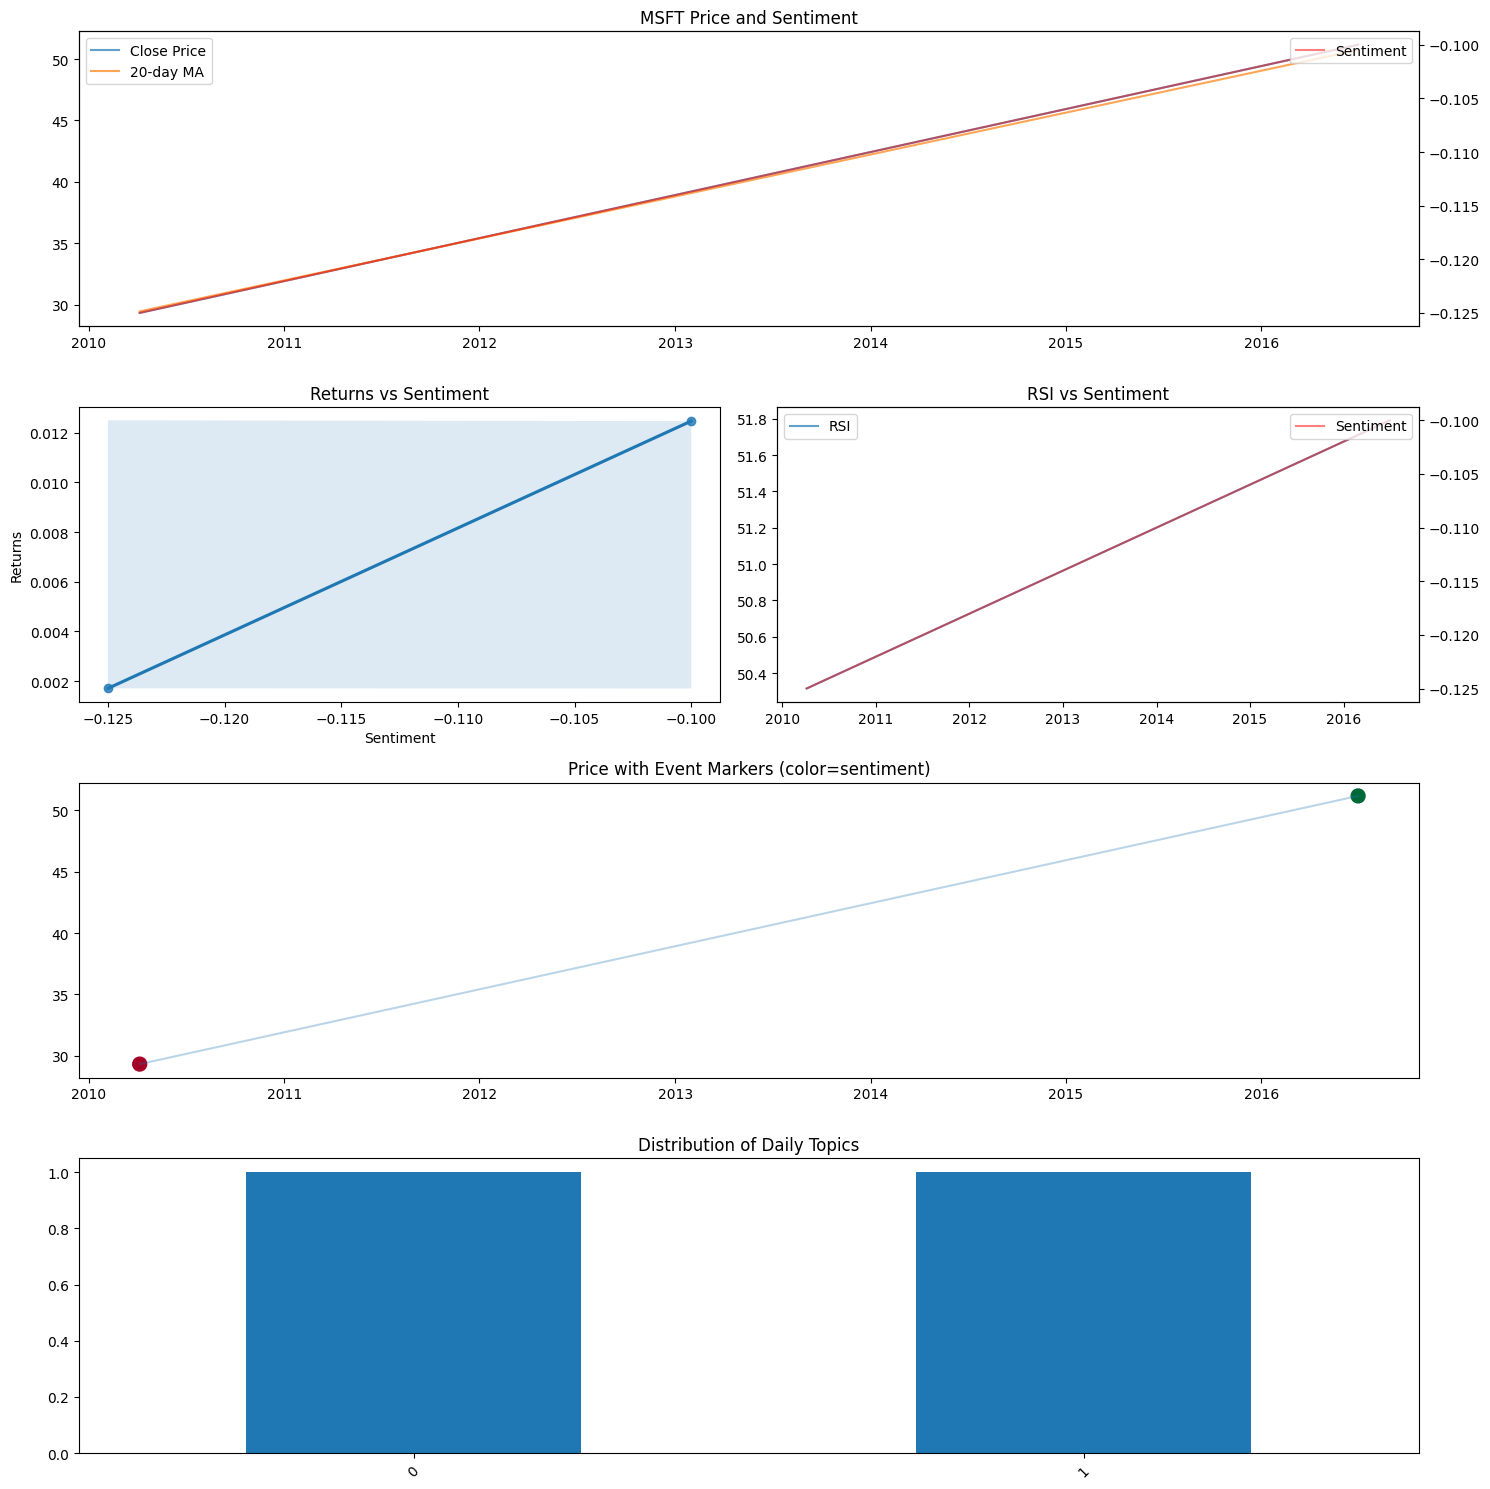


Plotting analysis for TSLA...


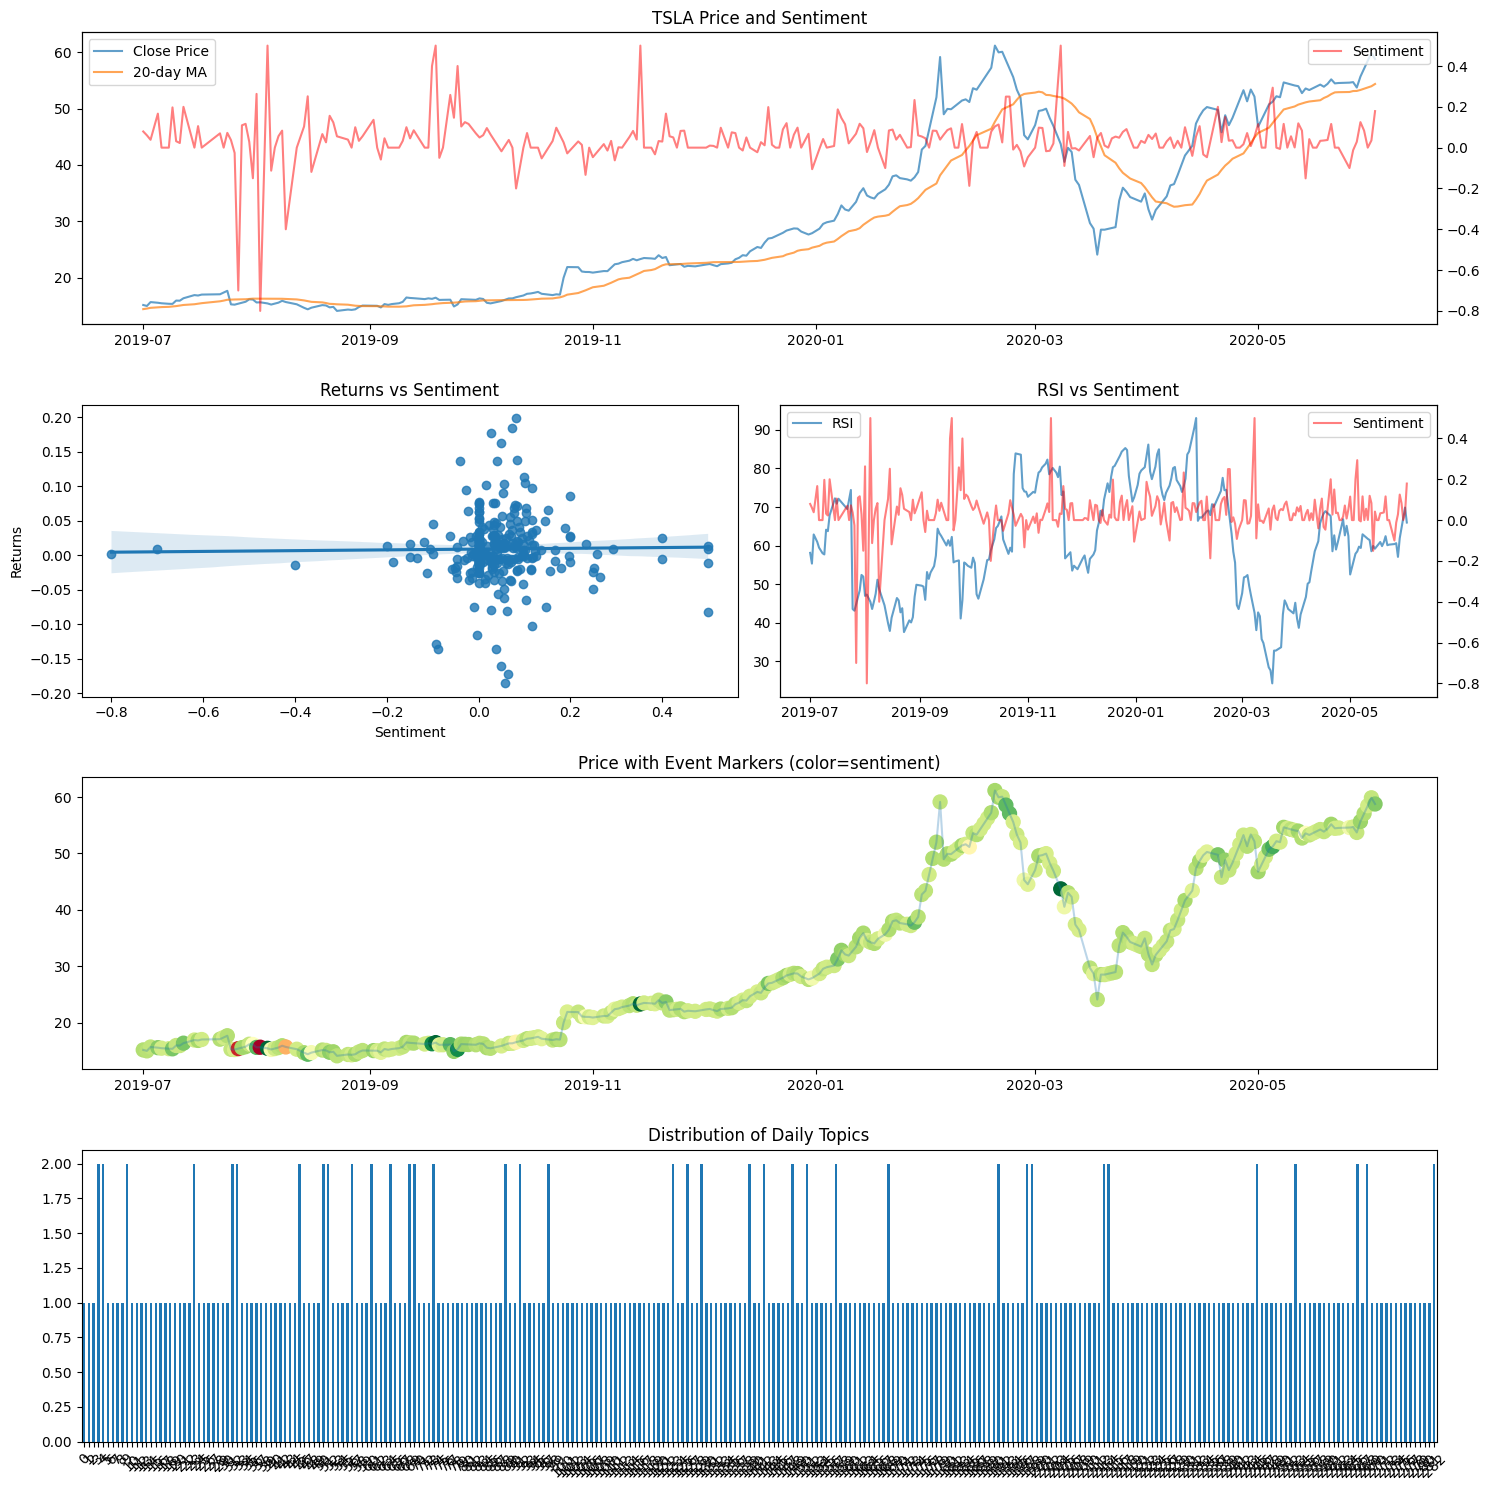


Plotting analysis for NVDA...


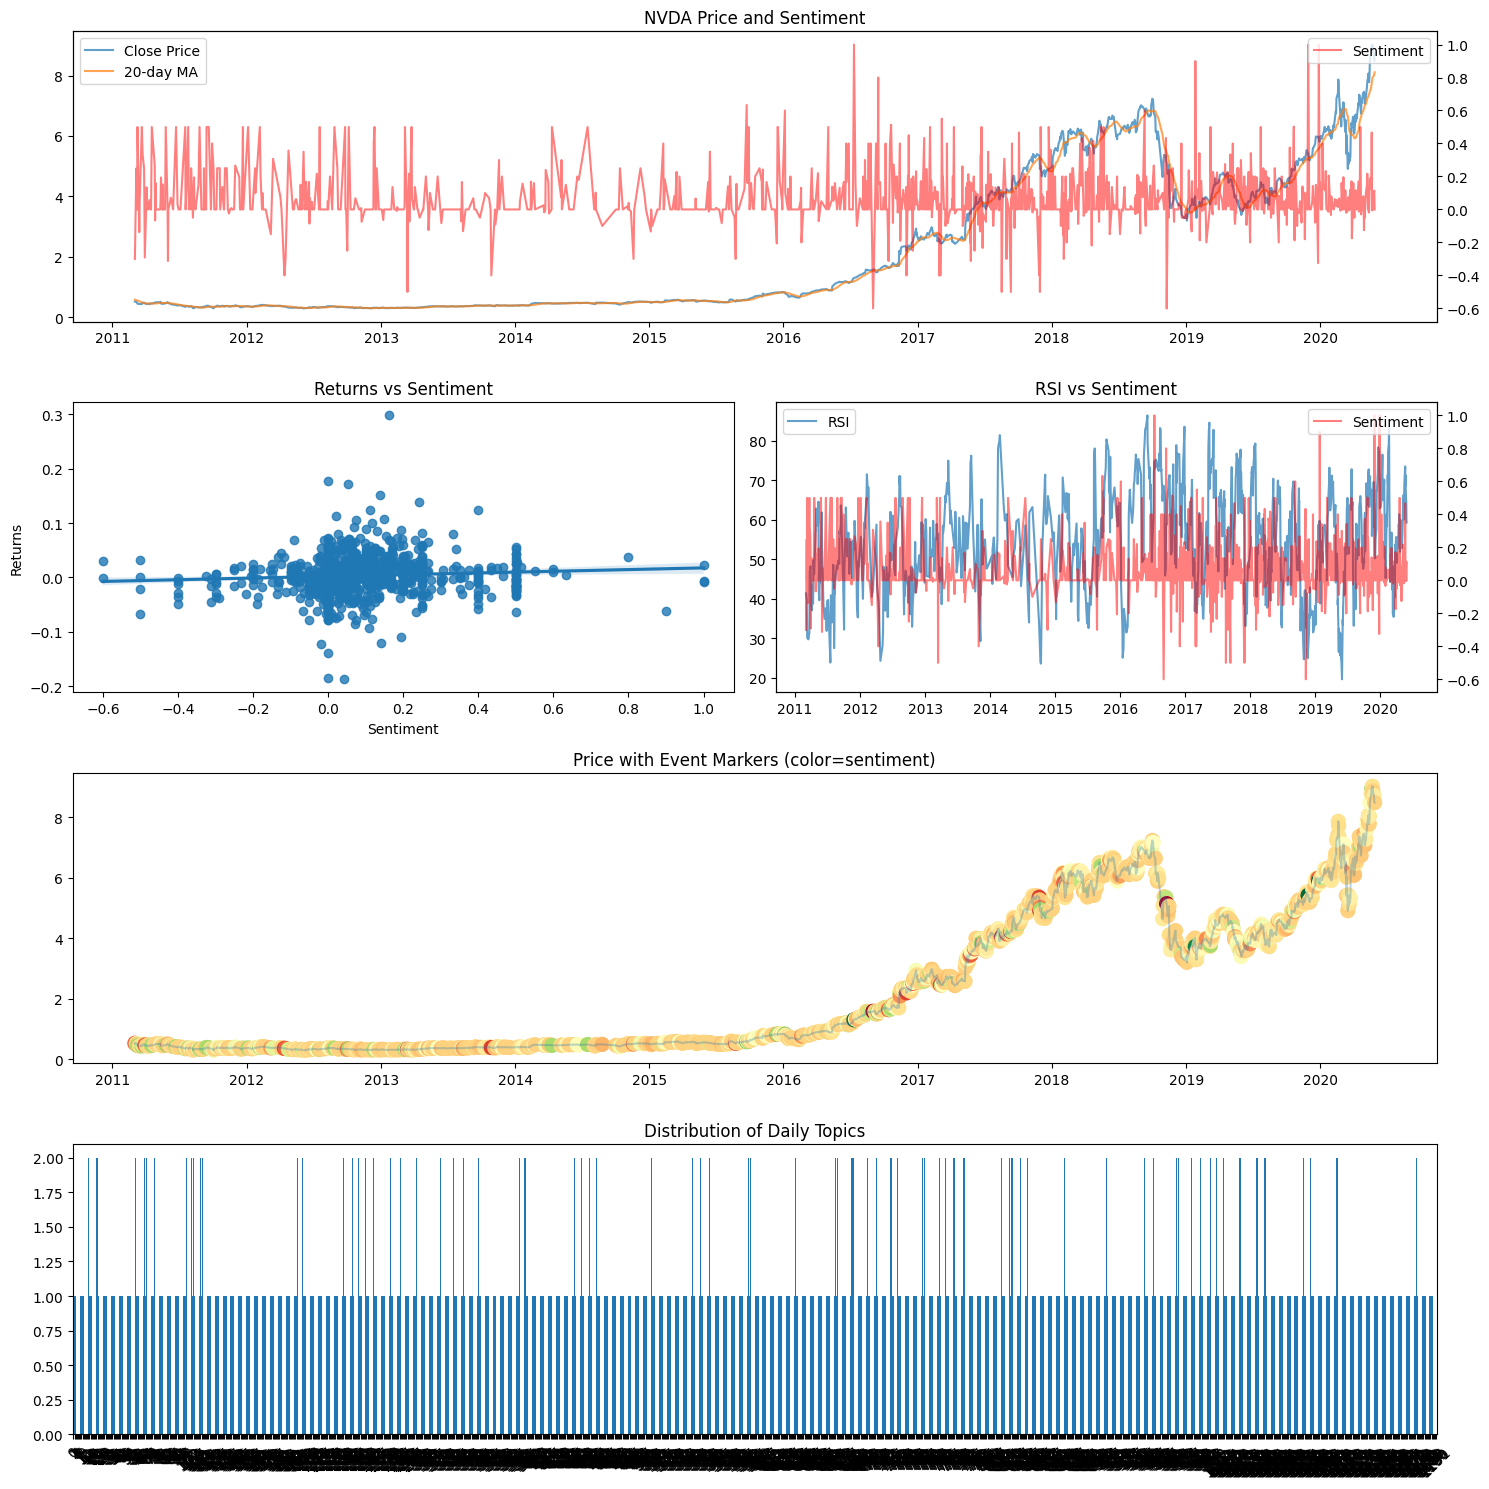

In [8]:
# Create visualizations for each company
print("\nGenerating visualizations...")
for symbol in analyzer.company_mappings.keys():
    print(f"\nPlotting analysis for {symbol}...")
    analyzer.plot_sentiment_vs_returns(symbol)

## Summary

In this notebook, we performed a comprehensive analysis of the relationship between news sentiment and stock price movements for major tech companies. The key steps included:

- **Data Loading:** Imported preprocessed news data (with topics and events) and historical stock price data for selected companies.
- **Sentiment Analysis:** Applied TextBlob and NLTK to extract sentiment scores and named entities from news headlines.
- **Data Aggregation:** Grouped news data by date and merged it with corresponding stock price data, ensuring proper alignment and handling of missing values.
- **Technical Analysis:** Incorporated technical indicators such as moving averages and RSI using the QuantitativeAnalyzer.
- **Visualization:** Created multi-faceted plots to visualize the interplay between sentiment, returns, technical indicators, and event-driven news.
- **Topic and Event Analysis:** Explored how specific news topics and events correlate with stock price changes and sentiment trends.

This workflow provides a foundation for understanding how news sentiment and specific events may impact stock market behavior, enabling further exploration and predictive modeling.